#Proyecto 2 - Parte I

In [39]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV
files_path = '/content/dataset3.csv'
data = pd.read_csv(files_path)

In [2]:
# Obtener información general del archivo
data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [3]:
#Verificar valores nulos
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [4]:
#Verificar valores duplicados
data.duplicated().sum()

0

In [5]:
#Analizar variables descriptivas
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [10]:
# Eliminamos la columna PersonID ya que el mismo no aporta valor al analisis
data = data.drop('Person ID', axis=1)

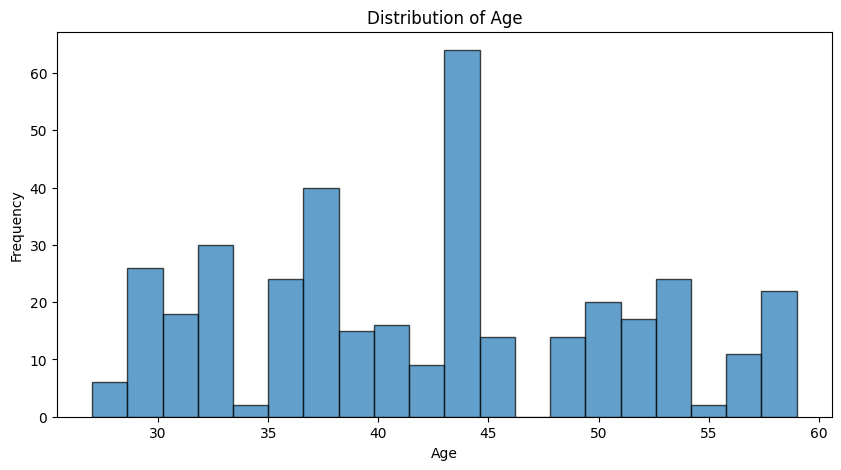

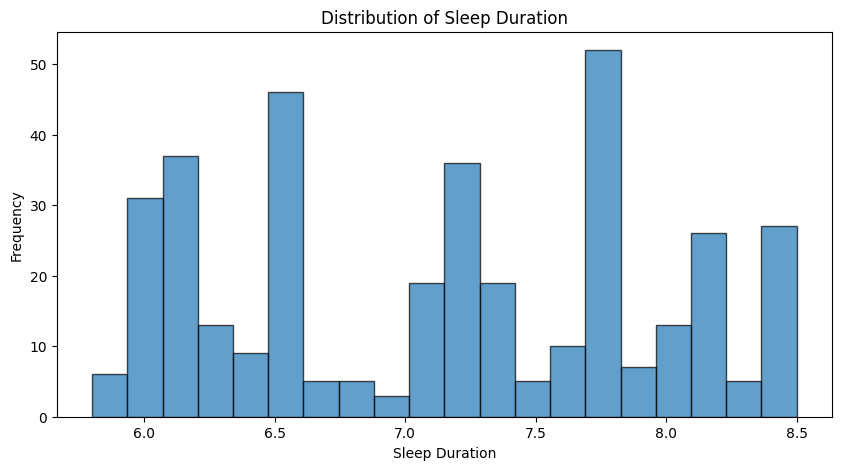

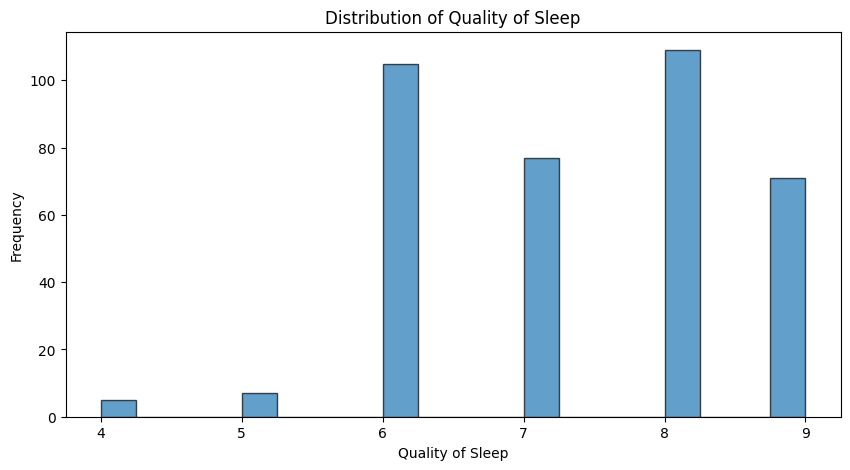

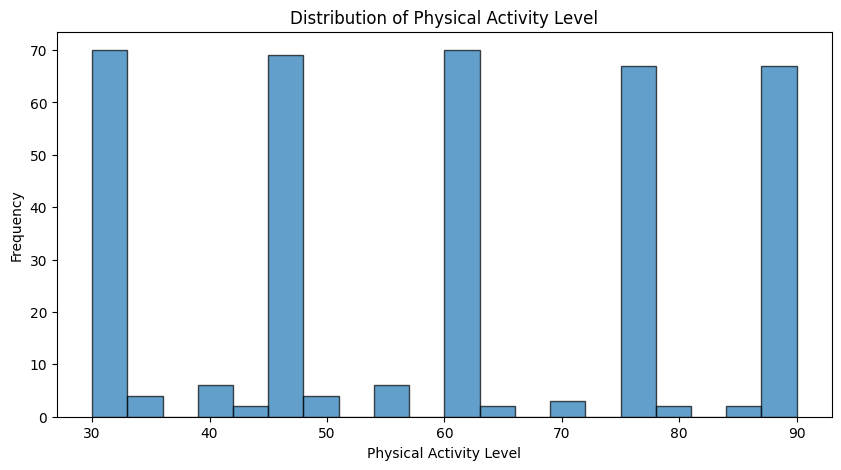

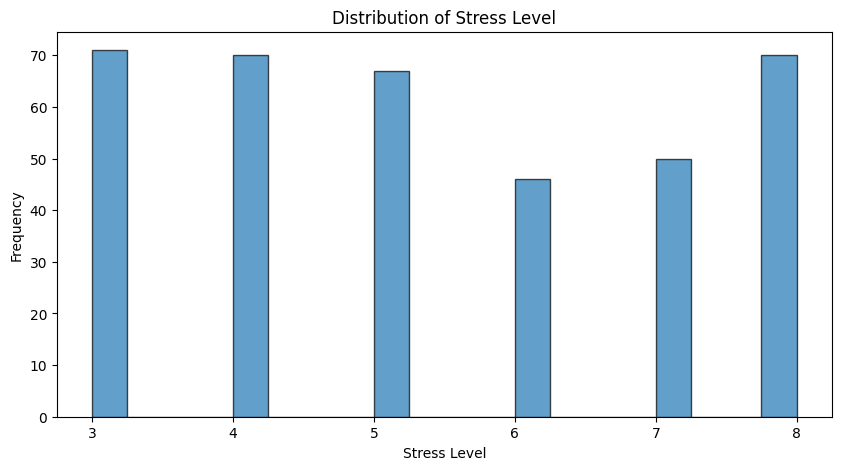

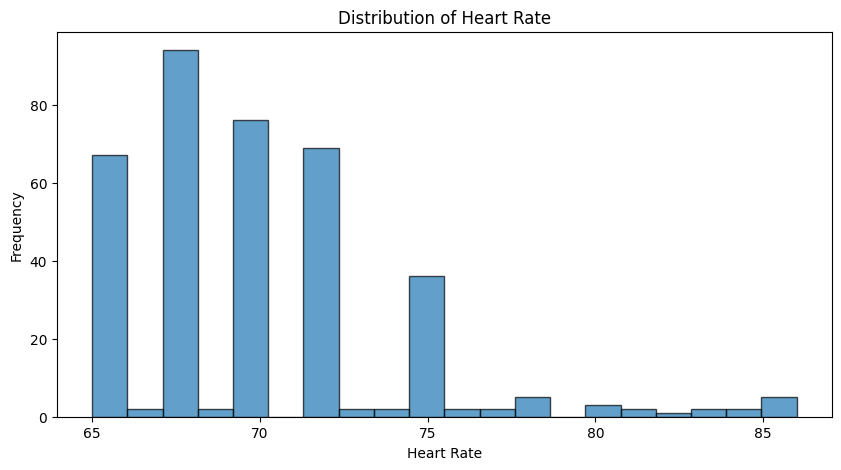

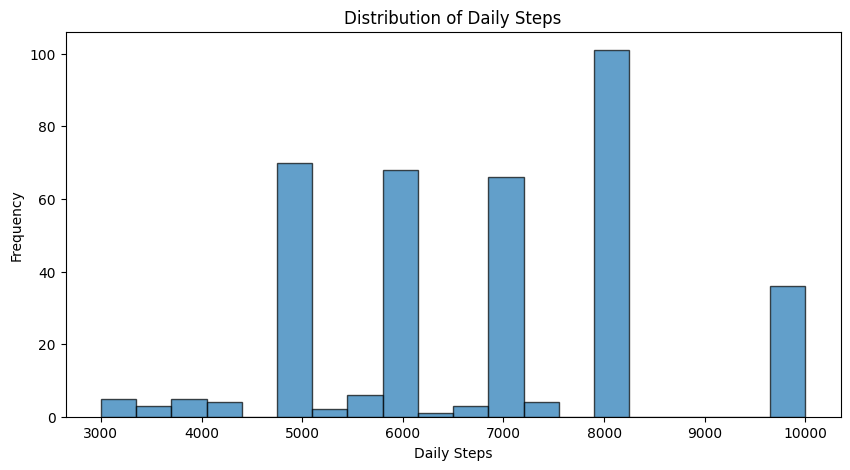

In [11]:
# Gráficos de histogramas para variables numéricas
numeric_columns_new = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns_new:
    plt.figure(figsize=(10, 5))
    plt.hist(data[column], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


**Edad:** Distribución uniforme entre 27 y 59 años, con una ligera concentración en los 40-50 años.
**Duración del Sueño:** Se observa un rango ajustado entre 6 y 8 horas, con valores extremos hacia ambos lados (menos de 6 y más de 8 horas).

**Calidad del Sueño:** Predominio de valores altos (6-9), lo que sugiere una población con un sueño mayoritariamente bueno.

**Pasos Diarios:** Distribución concentrada entre 5000 y 8000 pasos, con picos significativos en los 10000 pasos.

**Frecuencia de Actividad Física:** Mayoría de los valores se concentran alrededor de 60, indicando un nivel de actividad moderado.

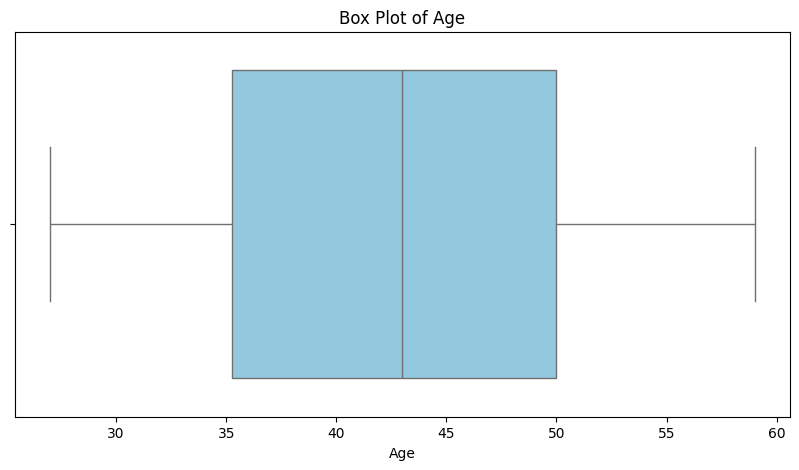

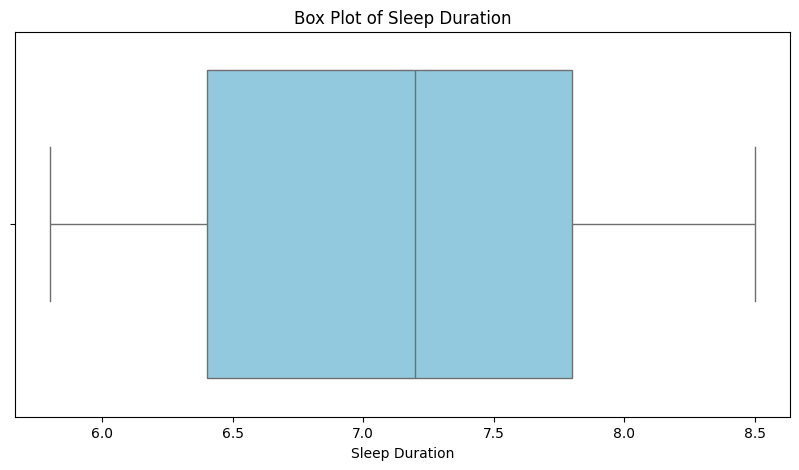

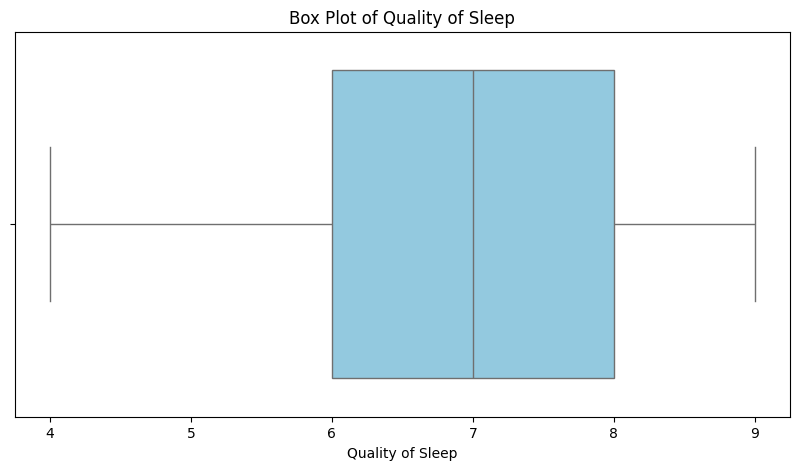

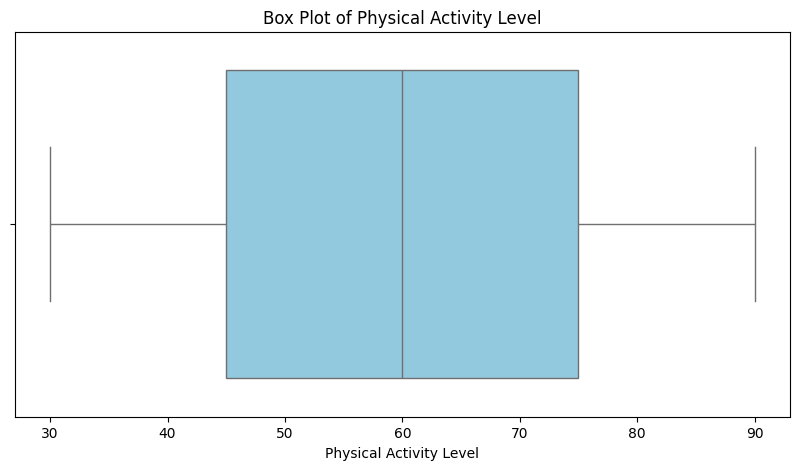

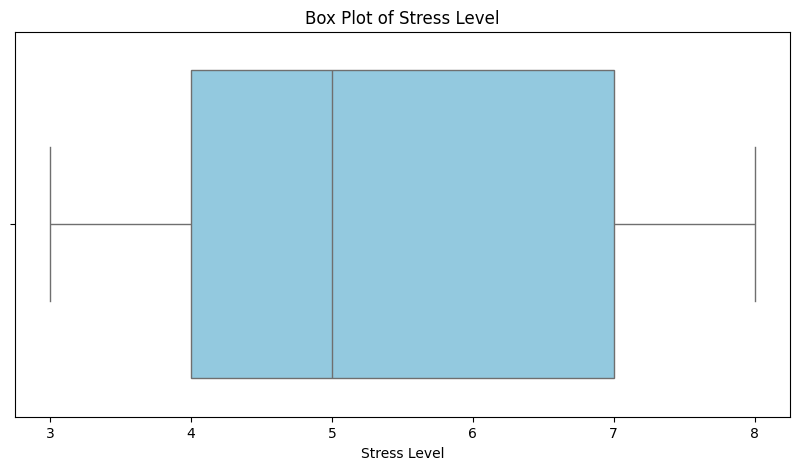

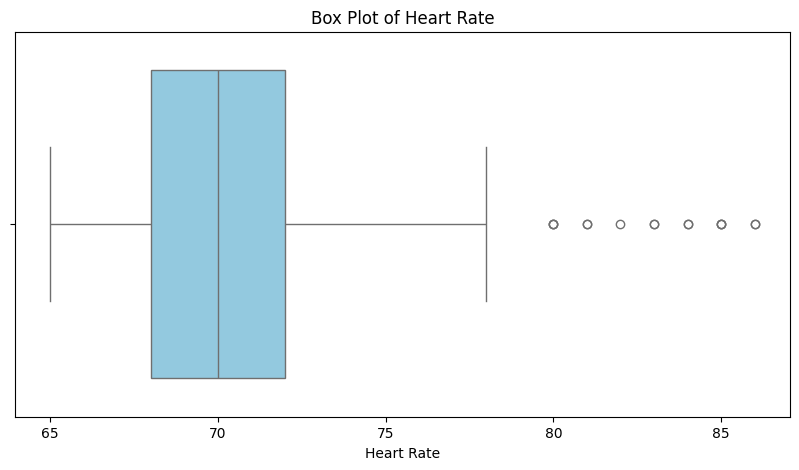

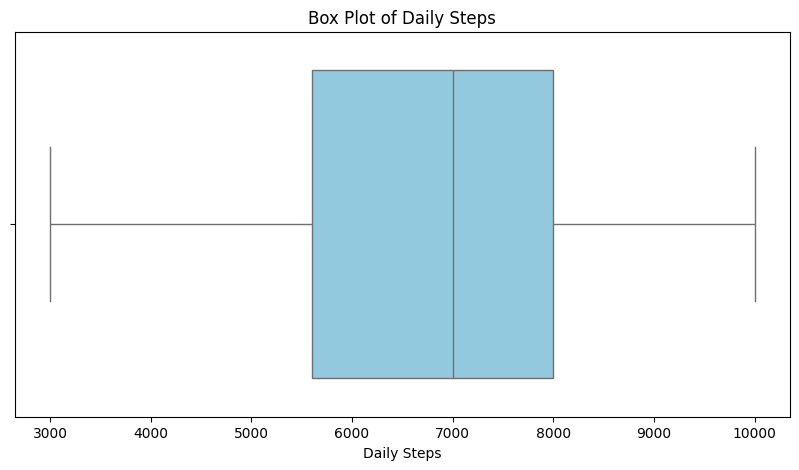

In [12]:
# Gráficos de box plots para detección de outliers
for column in numeric_columns_new:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


**Pasos Diarios:** Valores extremos por debajo de 4000 y en el máximo (10000 pasos), lo que podría indicar diferencias notables en los niveles de actividad diaria.

**Duración del Sueño:** Pocos valores extremos por debajo de 6 horas y por encima de 8.5 horas, reflejando hábitos de sueño atípicos.

**Calidad del Sueño:** Algunos valores por debajo de 5 (calidad baja) que podrían estar asociados a trastornos del sueño.

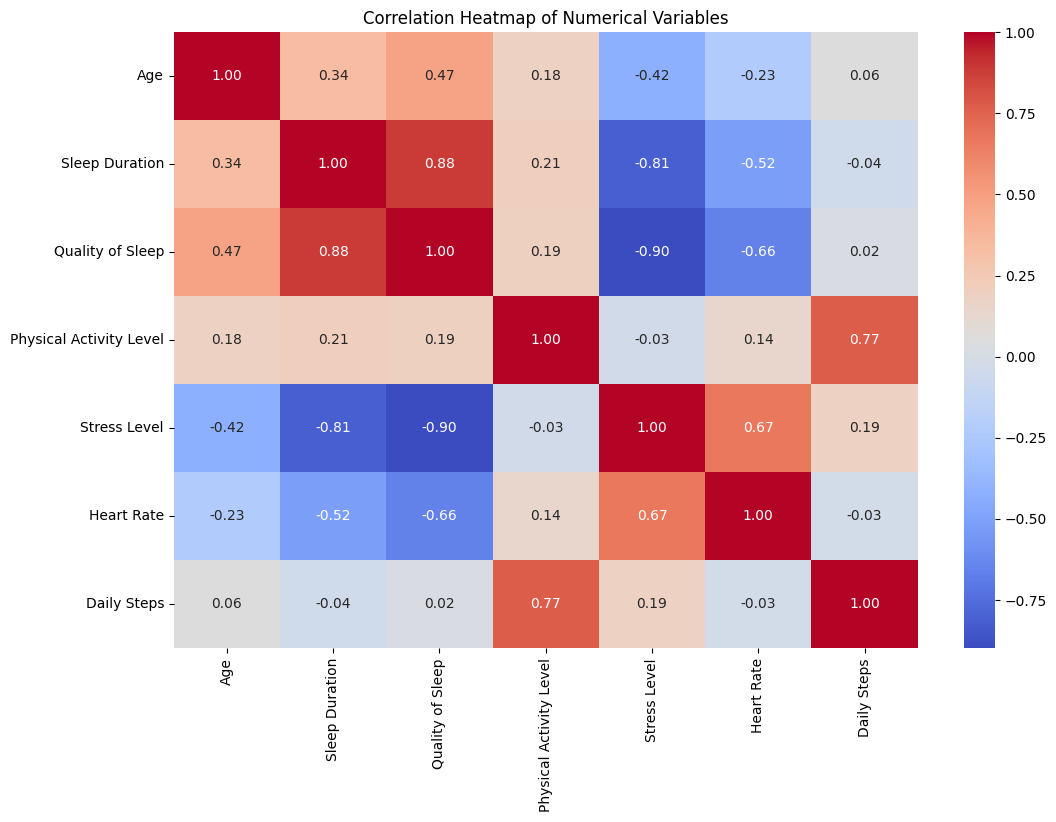

In [13]:
# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
correlation_matrix_new = data[numeric_columns_new].corr()
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


**Duración del Sueño y Calidad del Sueño:** Correlación moderada positiva (~0.5), indicando que dormir más está relacionado con una mejor calidad percibida.

**Nivel de Estrés y Calidad del Sueño:** Correlación negativa (~-0.4), lo que sugiere que niveles más altos de estrés reducen la calidad del sueño.

**Actividad Física y Pasos Diarios:** Correlación alta (~0.8), lo que confirma que ambas métricas son indicativas del mismo comportamiento.

**Estrés y Duración del Sueño:** Relación leve negativa (~-0.2), indicando un impacto moderado del estrés en la duración del sueño.

# Resumen de Hallazgos

1. Variable objetivo potencial: Quality of Sleep (Calidad del sueño).
2. Distribución: Valores concentrados entre 6 y 9, con un promedio de 7.31. Se observan algunos valores bajos (<5) que pueden indicar problemas de sueño.

**Tipos de datos:**

1. Variables categóricas clave:

 * Gender: Relación entre género y calidad del sueño.
 * Occupation: Impacto de la ocupación en los hábitos de sueño.
 * BMI Category: Asociado a condiciones de salud que pueden influir en el sueño.
 * Sleep Disorder: Clave para identificar trastornos que afecten la calidad del sueño.
2. Variables numéricas clave:

 * Sleep Duration: Influye directamente en la calidad del sueño.
 * Physical Activity Level: Relacionado con el bienestar general.
 * Stress Level: Indicador de factores externos que afectan el sueño.
 * Daily Steps: Indicador indirecto de actividad física y estilo de vida.

**Correlaciones:**

1. Relación moderada positiva entre Sleep Duration y Quality of Sleep (~0.5), lo que sugiere que dormir más mejora la calidad del sueño.
2. Relación negativa entre Stress Level y Quality of Sleep (~-0.4), destacando que altos niveles de estrés reducen la calidad percibida.
3. Alta correlación entre Physical Activity Level y Daily Steps (~0.8), indicando una relación directa entre ambos.

**Desafíos del Dataset:**

1. Valores extremos: Detectados en variables como Daily Steps y Sleep Duration, los cuales pueden distorsionar los análisis.
2. Distribuciones sesgadas: Variables como Sleep Duration muestran asimetrías, lo que podría requerir transformaciones para una mejor interpretación.
3. Heterogeneidad: Diferencias significativas en los hábitos de sueño, niveles de actividad física y estrés complican la identificación de patrones claros.

**Problemática Seleccionada:**

1. Clasificación: Predicción de la calidad del sueño (Quality of Sleep) con base en factores como duración del sueño, nivel de actividad física, estrés y trastornos del sueño.

**Justificación:**

1. Relevancia: Mejorar la calidad del sueño tiene implicaciones directas para la salud física y mental.
2. Impacto práctico: Identificar hábitos o condiciones que promuevan un mejor descanso puede ayudar a desarrollar recomendaciones personalizadas para los usuarios.
3. Desafío técnico: Requiere manejar relaciones no lineales, valores extremos y múltiples variables categóricas.

**Análisis Adicional:**

1. Outliers: Necesario tratarlos, especialmente en Daily Steps y Sleep Duration.
2. Variables categóricas: Requieren codificación adecuada para su uso en modelos predictivos.
3. Equilibrio de clases: Revisar la distribución de la calidad del sueño para evitar sesgos en el modelo.
4. Modelos no lineales: Considerar árboles de decisión o métodos avanzados para capturar interacciones complejas.

#Proyecto 2-Parte II

In [40]:
# Importamos las librerias para poder realizar los analisis
!pip install optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import optuna

In [41]:
# Mostramos la informacion de nuestro dataset
data_info = {
    "Head": data.head(),
    "Info": data.info(),
    "Describe": data.describe(include='all')
}
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


{'Head':    Person ID Gender  Age            Occupation  Sleep Duration  \
 0          1   Male   27     Software Engineer             6.1   
 1          2   Male   28                Doctor             6.2   
 2          3   Male   28                Doctor             6.2   
 3          4   Male   28  Sales Representative             5.9   
 4          5   Male   28  Sales Representative             5.9   
 
    Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
 0                 6                       42             6   Overweight   
 1                 6                       60             8       Normal   
 2                 6                       60             8       Normal   
 3                 4                       30             8        Obese   
 4                 4                       30             8        Obese   
 
   Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
 0         126/83          77         4200            NaN  
 1        

In [43]:
# Reemplazar 'None' por 'No Disorder' en la columna 'Sleep Disorder' para evitar conflictos
data['Sleep Disorder'] = data['Sleep Disorder'].replace([None, 'None'], 'No Disorder')

# Verificamos que se haya realizado el cambio
print(data['Sleep Disorder'].unique())

['No Disorder' 'Sleep Apnea' 'Insomnia']


In [44]:
# Preparamos las columnas categóricas y numéricas
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data = data.drop(columns=['Blood Pressure'])
categorical_columns = ['Gender', 'Occupation', 'BMI Category']
numeric_columns = ['Age', 'Sleep Duration', 'Quality of Sleep',
                   'Physical Activity Level', 'Stress Level',
                   'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']


In [45]:
# Dividimos los datos en características y etiquetas
y = data['Sleep Disorder']
X = data.drop(columns=['Person ID', 'Sleep Disorder'])

In [46]:
# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
# Creamos el preprocesador
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],
    remainder='drop'
)

In [49]:
# Preprocesamos los datos
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [50]:
# GridSearchCV para SVM
svm_model = SVC(random_state=42)
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svm_model, param_grid_svm, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_processed, y_train)
print("GridSearchCV:")
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación (accuracy):", grid_search.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
GridSearchCV:
Mejores parámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Mejor puntuación (accuracy): 0.8995622895622896


In [51]:
# RandomizedSearchCV para SVM
param_dist_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}
random_search = RandomizedSearchCV(svm_model, param_dist_svm, n_iter=20, cv=3, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train_processed, y_train)
print("\nRandomizedSearchCV:")
print("Mejores parámetros:", random_search.best_params_)
print("Mejor puntuación (accuracy):", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

RandomizedSearchCV:
Mejores parámetros: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Mejor puntuación (accuracy): 0.8962289562289563


In [52]:
# Optuna para SVM
def objective(trial):
    C = trial.suggest_loguniform('C', 0.1, 1000)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42)
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("\nOptuna:")
print("Mejores parámetros:", study.best_params)
print("Mejor puntuación (accuracy):", study.best_value)

[I 2024-11-24 00:18:47,668] A new study created in memory with name: no-name-380433fd-2ae9-48c9-a4b5-f6a67d8fbab8
<ipython-input-52-921e8386a0bd>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000)
[I 2024-11-24 00:18:47,682] Trial 0 finished with value: 0.96 and parameters: {'C': 1.1628547687436035, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 0.96.
<ipython-input-52-921e8386a0bd>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000)
[I 2024-11-24 00:18:47,695] Trial 1 finished with value: 0.9333333333333333 and parameters: {'C': 8.500074828949947, 'kernel': 'sigmoid', '


Optuna:
Mejores parámetros: {'C': 0.6569031935721809, 'kernel': 'poly', 'gamma': 'scale'}
Mejor puntuación (accuracy): 0.9733333333333334


In [53]:
# Evaluamos el mejor modelo de Optuna en el conjunto de prueba
best_params_optuna = study.best_params
best_model_optuna = SVC(**best_params_optuna, random_state=42)
best_model_optuna.fit(X_train_processed, y_train)
y_pred_optuna = best_model_optuna.predict(X_test_processed)
print("\nReporte de Clasificación (Optuna):\n", classification_report(y_test, y_pred_optuna))


Reporte de Clasificación (Optuna):
               precision    recall  f1-score   support

    Insomnia       1.00      0.87      0.93        15
 No Disorder       1.00      1.00      1.00        44
 Sleep Apnea       0.89      1.00      0.94        16

    accuracy                           0.97        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.98      0.97      0.97        75

